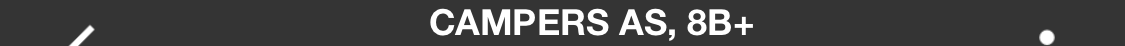

In [2]:
from PIL import Image

def crop_image(image_path, rowA, rowB, col_in_from_left, col_in_from_right):
    """
    Crops an image to keep only the rows from rowA to rowB (inclusive).

    Parameters:
    image_path (str): Path to the image file.
    rowA (int): Index of the first row to keep.
    rowB (int): Index of the last row to keep.

    Returns:
    PIL.Image: A cropped version of the input image.
    """
    with Image.open(image_path) as img:
        # Get the dimensions of the input image
        width, height = img.size

        # Crop the image to keep only the rows from rowA to rowB
        cropped_img = img.crop((0, rowA, width, rowB + 1))

    return cropped_img

img_path = "/Users/johnmundahl/Documents/Work/Learn/MachineLearning/Fast.ai_DL1/Lesson2/Deploy/fastai_DL1_lecture2_climbing/imgs/IMG_1845.PNG"
cropped_image = crop_image(img_path, 180, 225, 100, 100)
cropped_image

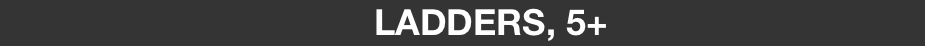

In [1]:
from PIL import Image

def crop_image(image_path, rowA, rowB, colL=None, colR=None):
    """
    Crops an image to keep only the rows from rowA to rowB (inclusive),
    and optionally crops columns from the left and right edges of the image.

    Parameters:
    image_path (str): Path to the image file.
    rowA (int): Index of the first row to keep.
    rowB (int): Index of the last row to keep.
    colL (int): Number of columns to crop from the left edge of the image (default None).
    colR (int): Number of columns to crop from the right edge of the image (default None).

    Returns:
    PIL.Image: A cropped version of the input image.
    """
    with Image.open(image_path) as img:
        # Get the dimensions of the input image
        width, height = img.size

        # Determine the left and right bounds of the cropped image
        left = colL if colL else 0
        right = width - colR if colR else width

        # Crop the image to keep only the rows from rowA to rowB and optionally
        # crop columns from the left and right edges of the image
        cropped_img = img.crop((left, rowA, right, rowB + 1))

    return cropped_img

img_path = "/Users/johnmundahl/Documents/Work/Learn/MachineLearning/Fast.ai_DL1/Lesson2/Deploy/fastai_DL1_lecture2_climbing/imgs/IMG_1844.PNG"
cropped_image = crop_image(img_path, 180, 225, 100, 100)
cropped_image

In [6]:
!python --version
!pip install pytesseract

Python 3.10.9


In [2]:
import pytesseract

# pytesseract.pytesseract.tesseract_cmd = r''

def ocr_image(img):
    """
    Performs optical character recognition (OCR) on an input image and
    returns the resulting text as a string.

    Parameters:
    img (PIL.Image): The input image as a PIL image variable.

    Returns:
    str: The resulting OCR text.
    """
    # Convert the input image to grayscale
    img = img.convert("L")

    # Perform OCR using pytesseract
    text = pytesseract.image_to_string(img)

    return text

ocr_title_and_grade = ocr_image(cropped_image)
ocr_title_and_grade

'LADDERS, 5+\n'

In [8]:
# !brew install tesseract
# !pip install pytesseract
!tesseract --version
# !export PATH="/usr/local/bin:$PATH"

tesseract 5.2.0
 leptonica-1.82.0
  libgif 5.2.1 : libjpeg 9e : libpng 1.6.39 : libtiff 4.5.0 : zlib 1.2.13 : libwebp 1.2.4 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.6.2 zlib/1.2.13 liblzma/5.2.10 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.2


In [3]:
def process_string(input_string):
    """
    Splits the input string at each ", ", takes the last substring after the split,
    removes any "\n", and returns the resulting string.

    Parameters:
    input_string (str): The input string to be processed.

    Returns:
    str: The resulting processed string.
    """
    # String to split the input by
    splitting_string = ", "
    
    # Split the input string at each ", "
    substrings = input_string.split(splitting_string)

    # Take the last substring after the split
    last_substring = substrings[-1]

    # Remove any "\n" from the last substring
    processed_string = last_substring.replace("\n", "")
    
    # Take the first substring after the split
    title_substring = splitting_string.join(substrings[:-1])
    
    # Remove any "/" from the substring
    title_substring = title_substring.replace("/", "--")
    title_substring = title_substring.replace("\\", "--")

    # Remove any "\n" from the last substring
    processed_string = last_substring.replace("\n", "")

    return processed_string, title_substring

ocr_grade, ocr_title = process_string(ocr_title_and_grade)
ocr_grade, ocr_title

('5+', 'LADDERS')

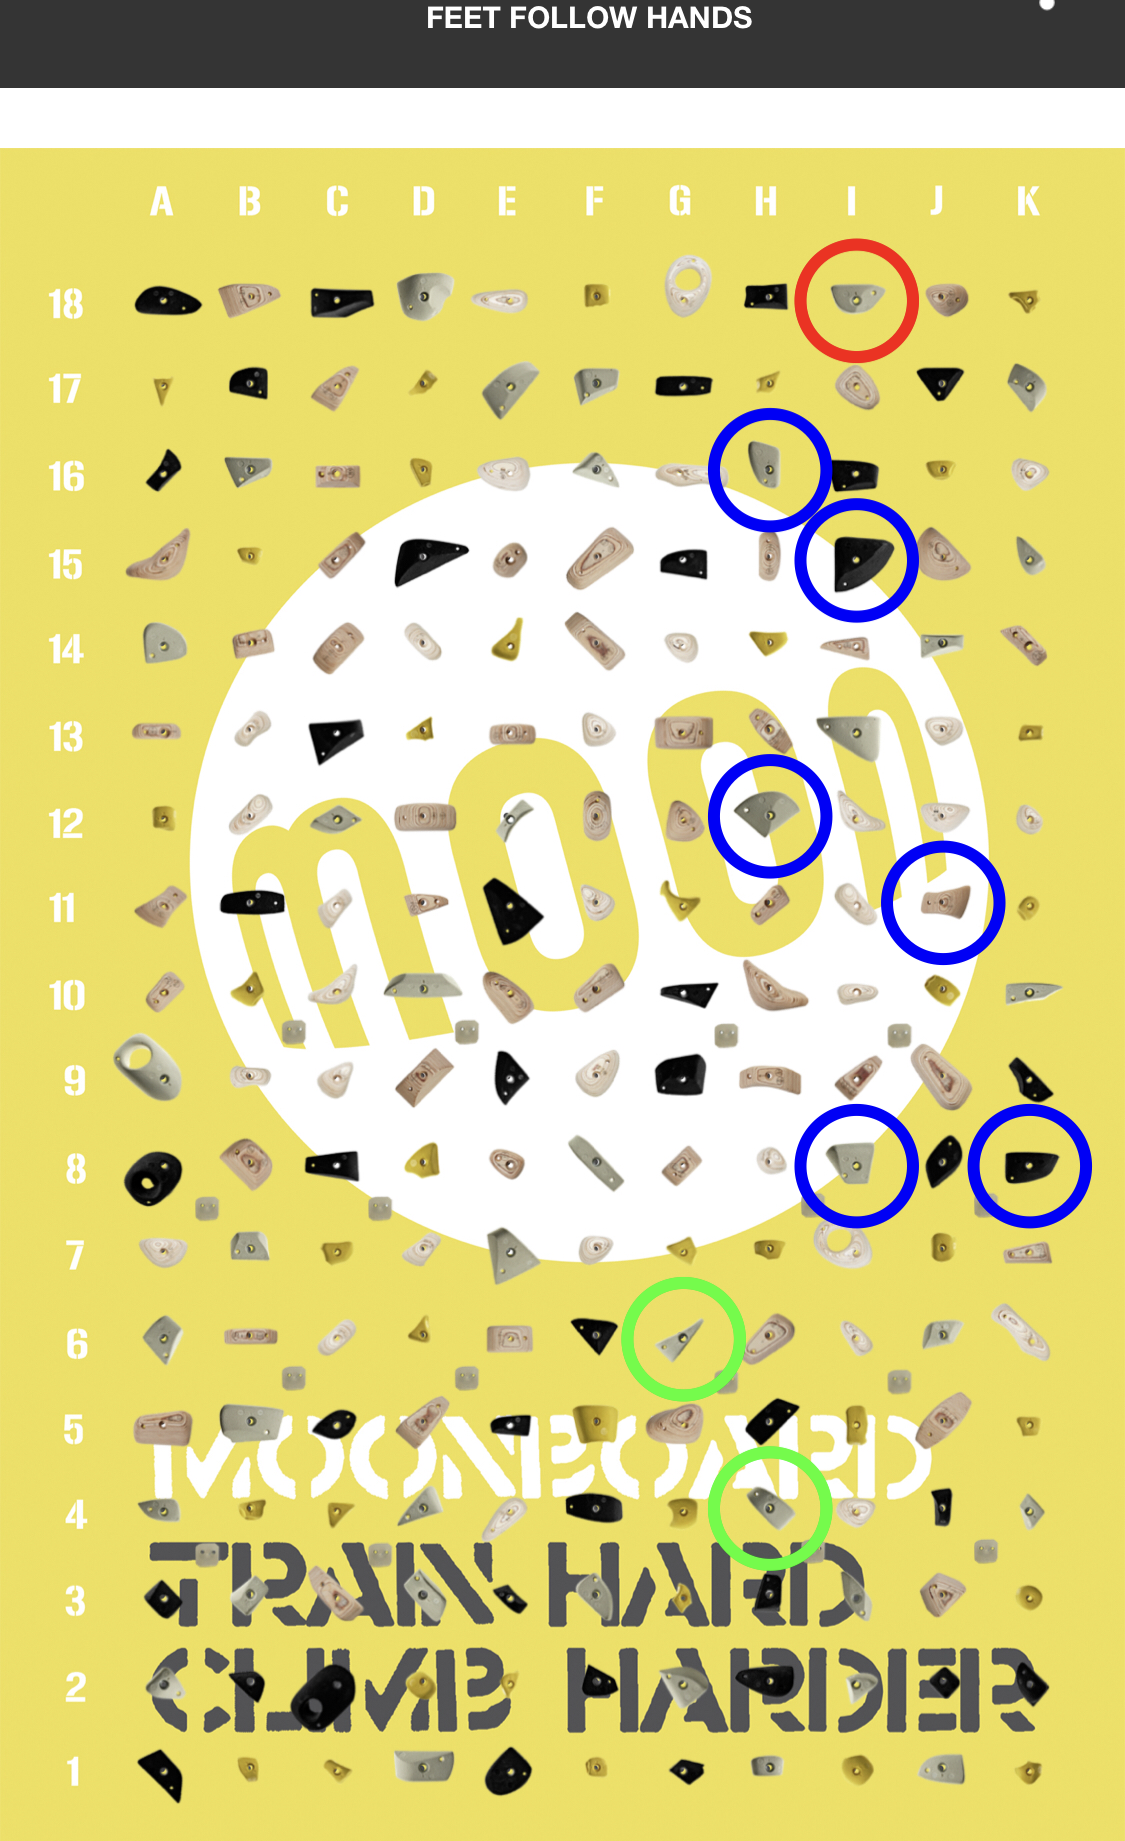

In [5]:
img_path = "/Users/johnmundahl/Documents/Work/Learn/MachineLearning/Fast.ai_DL1/Lesson2/Deploy/fastai_DL1_lecture2_climbing/imgs/IMG_1844.PNG"
cropped_route = crop_image(img_path, 260, 2100, 0, 0)
cropped_route

/var/folders/qm/8rgfvy892kb64509yr9vs_wc0000gn/T/ipykernel_51932/3536688983.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((width_out, height_out), Image.ANTIALIAS)


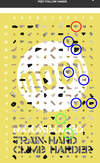

In [6]:
from PIL import Image

def resize_image(img, width_out):
    """
    Resizes the input image so that the width is equal to the specified output width
    and the length is scaled proportionally to the width.

    Parameters:
    img (PIL.Image.Image): The input image to be resized.
    width_out (int): The desired output width in pixels.

    Returns:
    PIL.Image.Image: The resized image.
    """
    # Get the original width and height of the image
    width_in, height_in = img.size

    # Calculate the scaling factor to resize the width to the desired output width
    scale_factor = width_out / width_in

    # Calculate the new height based on the scaling factor
    height_out = int(height_in * scale_factor)

    # Resize the image using the calculated width and height
    resized_img = img.resize((width_out, height_out), Image.ANTIALIAS)

    return resized_img

resized_route = resize_image(cropped_route, 100)
resized_route

In [7]:
image_name = "processed/" + ocr_title + "__" + ocr_grade + ".jpg"
resized_route.save(image_name)

FileNotFoundError: [Errno 2] No such file or directory: 'processed/LADDERS__5+.jpg'

In [8]:
import glob

# Specify the folder path containing the PNG files
folder_path = "/Users/johnmundahl/Documents/Work/Learn/MachineLearning/Fast.ai_DL1/Lesson2/Deploy/fastai_DL1_lecture2_climbing/imgs"

# Use the glob module to get a list of all the PNG files in the folder
png_files = glob.glob(folder_path + "/*.PNG")

all_grades = []
list_grades = []
list_titles = []

# Iterate over the list of PNG files
for png_file in png_files:
    # Process the PNG file here
    cropped_image = crop_image(png_file, 180, 225, 100, 100)
    ocr_title_and_grade = ocr_image(cropped_image)
    ocr_grade, ocr_title = process_string(ocr_title_and_grade)
    list_grades.append(ocr_grade)
    list_titles.append(ocr_title)
    #cropped_route = crop_image(png_file, 260, 2100, 0, 0)
    #resized_route = resize_image(cropped_route, 1000)
    #image_name = "processed/" + ocr_title + "__" + ocr_grade + ".jpg"
    #resized_route.save(image_name)
    if ocr_grade not in all_grades:
        all_grades.append(ocr_grade)
    

import collections
counts = collections.Counter(list_grades)

for item, count in counts.items():
    print(f"{item}: {count}")
    
counts_title = collections.Counter(list_titles)

for item, count in counts_title.items():
    print(f"{item}: {count}")

5+: 120
6A+: 38
6A: 56
7A: 22
8B+: 9
6B: 33
6B+: 28
6C: 26
7B+: 10
7A+: 10
6C+: 20
7B: 26
POST HYPOXIC MYOCLONUS: 1
ZIPPY PUGUA: 1
NAZGUL 5: 1
JKL: 1
WOOD ONLY #4: 1
FUN IN SEVILLA: 1
WOOD 5: 1
BIG SALE 25°: 1
WHITE SMOKE 25°: 1
IMPOSTOR MODE: 1
JAYME SLUICE: 1
THUNDER FROM DOWNUNDER: 1
FIRST TEST: 1
CHAUCHAU TARTINE: 1
UNDA CLANK CROSS: 1
RAINY DAZED: 1
CAMPERS AS: 2
DER GRUNE: 1
CUTIE: 1
HAKA: 1
OKAY DOOD: 1
WOODWARD: 1
NEED TO WORK ON THIS ONE: 1
NUGGET PRESSURE 25°: 1
LES BOREADES 25°: 1
TOEPRESS 25’: 1
ANZZY#5: 1
VILLE PREND 2 AILES: 1
SIDE FOOL: 1
N. 1: 1
WHYNOT,: 1
DP4: 1
TWO ANGELS FIRST CLIMB: 1
BUILT FOR PLEASURE: 1
HEEHEEHEEHAW: 1
WAY TO SIX 25°: 1
SERRE COPAIN: 1
CHEAP FLIGHTS: 1
RIGHT SIDE ROCKS: 1
BEANS: 1
1150: 1
SCANDINAVIAN MALE ANGST: 1
HALF CIRCLE.: 1
ENDURANCE: 1
SUNDAY SIDE: 1
LEFT HANGING: 1
WARMUP - ARTEMIS: 1
KG LADIES: 1
T REX 25: 1
CYPHER 25: 1
PARAPARA-VAR 25: 1
MUSETRAPPE: 1
EASIER WARMUP: 1
SATAY: 1
YELLOW TROUBLE: 1
COBRA: 1
AREPAS AND HUMMUS: 1
ANZZY#4: 1

In [50]:
all_grades.sort()
all_grades



['5+', '6A', '6A+', '6B', '6B+', '6C', '6C+', '7A', '7A+', '7B', '7B+', '8B+']

In [53]:
list_titles

['5+\n',
 '6A+\n',
 '6A\n',
 '5+\n',
 '5+\n',
 '6A\n',
 '7A\n',
 '5+\n',
 '6A\n',
 '8B+\n',
 '5+\n',
 '6A+\n',
 '6A\n',
 '6B\n',
 '6B+\n',
 '6A+\n',
 '8B+\n',
 '5+\n',
 '6A+\n',
 '6A\n',
 '6B+\n',
 '5+\n',
 '5+\n',
 '6A+\n',
 '6C\n',
 '6C\n',
 '6A\n',
 '6B\n',
 '6C\n',
 '7B+\n',
 '7A+\n',
 '5+\n',
 '5+\n',
 '5+\n',
 '8B+\n',
 '6C+\n',
 '7B\n',
 '6B\n',
 '5+\n',
 '6C\n',
 '6A\n',
 '7B\n',
 '8B+\n',
 '6B\n',
 '5+\n',
 '6B+\n',
 '5+\n',
 '5+\n',
 '6A+\n',
 '6C\n',
 '7A\n',
 '6A\n',
 '5+\n',
 '6B+\n',
 '5+\n',
 '6C\n',
 '5+\n',
 '6B\n',
 '6C\n',
 '7B\n',
 '8B+\n',
 '6C+\n',
 '7A\n',
 '6B\n',
 '5+\n',
 '6B+\n',
 '6A\n',
 '8B+\n',
 '7B\n',
 '6A\n',
 '7A+\n',
 '6B\n',
 '5+\n',
 '5+\n',
 '6A+\n',
 '6A\n',
 '7A\n',
 '6A\n',
 '6A\n',
 '7A\n',
 '5+\n',
 '6A\n',
 '6A\n',
 '6C+\n',
 '6A\n',
 '7B\n',
 '8B+\n',
 '6B\n',
 '6A+\n',
 '5+\n',
 '6C+\n',
 '7A\n',
 '5+\n',
 '7B+\n',
 '6B+\n',
 '5+\n',
 '5+\n',
 '5+\n',
 '6A+\n',
 '5+\n',
 '6A\n',
 '6A\n',
 '5+\n',
 '5+\n',
 '5+\n',
 '6A\n',
 '5+\n',
 '5+\n'

In [51]:
import collections
counts = collections.Counter(list_grades)

for item, count in counts.items():
    print(f"{item}: {count}")

5+: 120
6A+: 38
6A: 56
7A: 22
8B+: 9
6B: 33
6B+: 28
6C: 26
7B+: 10
7A+: 10
6C+: 20
7B: 26


In [48]:
len(list_grades)

360

In [54]:
!pip install xeus-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:0000:0100:01
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached debugpy-1.6.7-py2.py3-none-any.whl (4.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.6/797.6 kB 16.5 MB/s eta 0:00:0000:01
  Using cached appnope-0.1.3-py2.py3-none-any.whl (4.4 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached prompt_toolkit-3.0.38-py3-none-any.whl (385 kB)
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)
  Using cached traitlets-5.9.0-py3-none-any.whl (117 kB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached pexpect-4.8.0-py2.py3-none-any.whl (59 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached stack_data-0.6.2-py3-none-any.whl (24 kB)
  Using cached parso-0.8.3-py2.py3-none-any.whl (100 kB)
  Using cached ptyprocess-0.7.0-py2.py3-none-any.whl (13 